In [23]:
%matplotlib ipympl

import numpy as np
from uncertainties import ufloat, unumpy
from astropy.timeseries import LombScargle
import matplotlib.pyplot as plt
from onix.models.schiff import inverse_fa_limit

In [42]:
data = np.load("axion_test_data.npz")
times = data["times"]
W_Ts = data["W_Ts"]

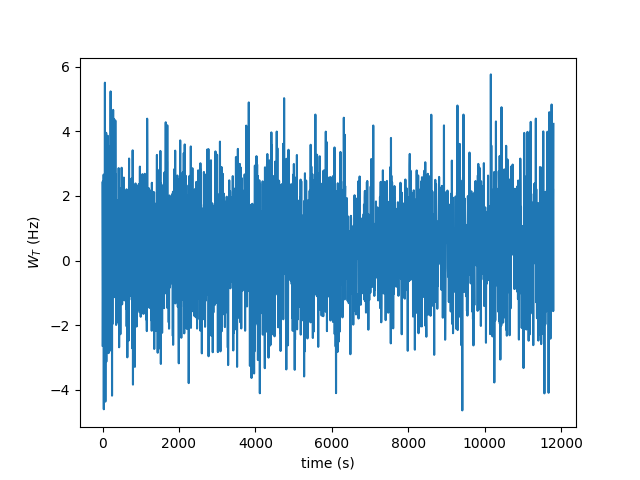

In [18]:
fig, ax = plt.subplots()
ax.plot(times, W_Ts)
ax.set_xlabel("time (s)")
ax.set_ylabel("$W_T$ (Hz)")
plt.show()

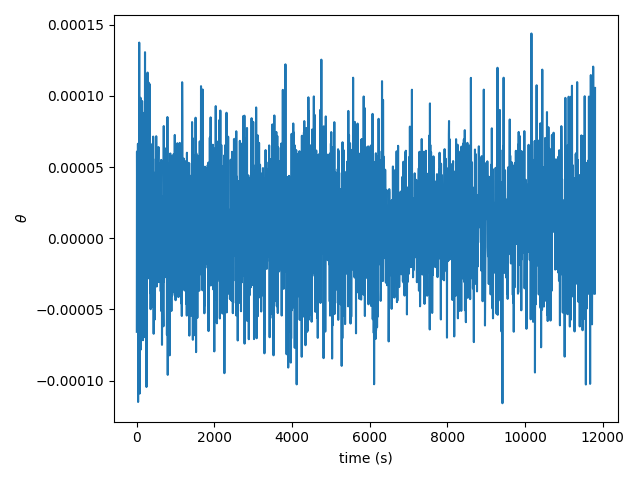

In [22]:
W_T_to_theta = 2.5e-5
# https://electricatoms.wordpress.com/2024/07/11/t-violation-measurement-from-lf-spectroscopy/
thetas = W_Ts * W_T_to_theta

fig, ax = plt.subplots()
ax.plot(times, thetas)
ax.set_xlabel("time (s)")
ax.set_ylabel("$\\theta$")
plt.tight_layout()
plt.show()

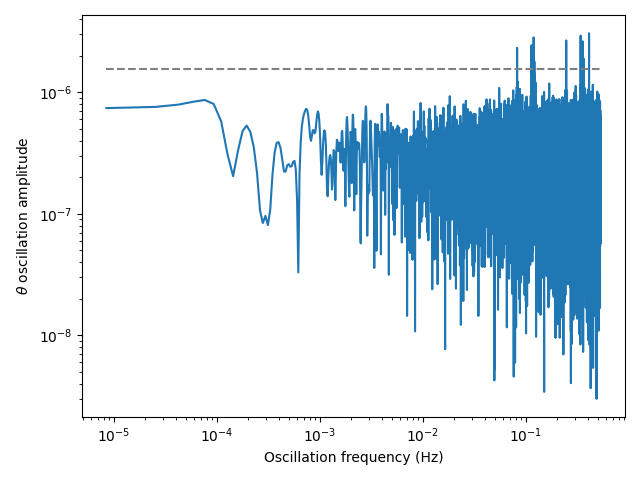

In [30]:
theta_uncs = np.std(thetas) * np.ones(len(thetas))  # assuming error bar is std of the data for every point
ls = LombScargle(times, thetas, theta_uncs, normalization="psd")
fs, f_thetas_psd = ls.autopower()
f_thetas_amplitude_normalized = np.sqrt(f_thetas_psd / (len(f_thetas_psd) / 4))
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lombscargle.html
f_thetas_amplitude = f_thetas_amplitude_normalized * np.std(thetas)
# https://docs.astropy.org/en/stable/timeseries/lombscargle.html#psd-normalization-unnormalized

confidence = 0.95
f_thetas_limit_psd = ls.false_alarm_level(1 - 0.95)
f_thetas_limit_amplitude = np.sqrt(f_thetas_limit_psd / (len(f_thetas_psd) / 4)) * np.std(thetas)
# same normalization as above

fig, ax = plt.subplots()
ax.plot(fs, f_thetas_amplitude)
ax.hlines([f_thetas_limit_amplitude], min(fs), max(fs), color="gray", ls="--", label=f"{confidence*100:.0f}%")
ax.set_xlabel("Oscillation frequency (Hz)")
ax.set_ylabel("$\\theta$ oscillation amplitude")
ax.set_xscale("log")
ax.set_yscale("log")
plt.tight_layout()
plt.show()

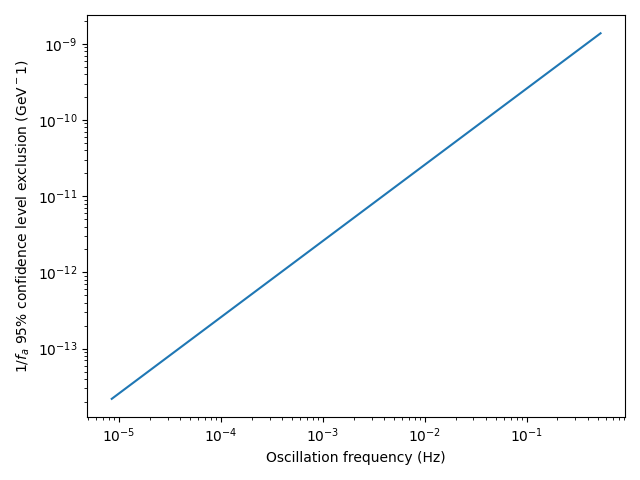

In [40]:
inverse_fa_limits = inverse_fa_limit(fs, f_thetas_limit_amplitude * np.ones(len(fs)))
fig, ax = plt.subplots()
ax.plot(fs, inverse_fa_limits)
ax.set_xlabel("Oscillation frequency (Hz)")
ax.set_ylabel(f"$1 / f_a$ {confidence*100:.0f}% confidence level exclusion (GeV$^{-1}$)")
ax.set_xscale("log")
ax.set_yscale("log")
plt.tight_layout()
plt.show()